<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/master/src/knn/knn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
input_path = '/content/drive/MyDrive/dm_fire_prediction/merge/merged_v4_no_duplicates_0_undersampled_23_77.csv'

In [6]:
df = pd.read_csv(input_path)
df.head()

,lcccode_label,elevation,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,tmax_summer,tmax_winter,tmin_autumn,tmin_spring,tmin_summer,tmin_winter,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M,fire
0,18.0,1043.0,15.0,57.5,27.5,15.0,1.410,1.620,0.7040,7.80,...,39,17,15,13,24,4,0,0,1,0
1,18.0,528.0,14.2,58.7,25.2,16.1,1.435,1.649,0.5969,7.73,...,42,20,18,15,26,5,0,0,1,0
2,18.0,900.0,15.0,57.5,27.5,15.0,1.410,1.620,0.7040,7.80,...,39,16,14,12,23,3,0,0,1,0
3,3.0,-1.0,11.4,50.6,32.2,17.2,1.442,1.662,0.6994,8.04,...,41,19,18,16,27,8,0,0,1,0
4,7.0,977.0,9.6,48.4,33.9,17.7,1.411,1.674,0.6256,8.14,...,35,13,12,9,19,3,0,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55219 entries, 0 to 55218
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lcccode_label    55219 non-null  float64
 1   elevation        55219 non-null  float64
 2   COARSE           55219 non-null  float64
 3   SAND             55219 non-null  float64
 4   SILT             55219 non-null  float64
 5   CLAY             55219 non-null  float64
 6   BULK             55219 non-null  float64
 7   REF_BULK         55219 non-null  float64
 8   ORG_CARBON       55219 non-null  float64
 9   PH_WATER         55219 non-null  float64
 10  TOTAL_N          55219 non-null  float64
 11  CN_RATIO         55219 non-null  float64
 12  CEC_SOIL         55219 non-null  float64
 13  CEC_CLAY         55219 non-null  float64
 14  CEC_EFF          55219 non-null  float64
 15  TEB              55219 non-null  float64
 16  BSAT             55219 non-null  float64
 17  ALUM_SAT    

## Handling imbalance

### Split (before resampling and feature engineering)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

X = df.drop(columns=['fire'])
y = df['fire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4, stratify=y)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49697, 38)
(5522, 38)
(49697,)
(5522,)


## Feature Selection

In [10]:
# corr_matrix2 = X_train.corr(method='spearman')
# corr_matrix2

In [11]:
# threshold = 0.95

# # Select upper triangle of correlation matrix
# upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool))

# # Find features with correlation greater than threshold
# strong_corr_pairs2 = [(col, row, upper2.loc[row, col])
#                      for col in upper2.columns
#                      for row in upper2.index
#                      if (upper2.loc[row, col] > threshold)]

# strong_corr_df2 = pd.DataFrame(strong_corr_pairs2, columns=['Feature_1', 'Feature_2', 'Correlation'])

# print(strong_corr_df2)

### Removing Correlated Features

In [12]:
corr_matrix = X_train.corr()
corr_matrix

,lcccode_label,elevation,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,tmax_spring,tmax_summer,tmax_winter,tmin_autumn,tmin_spring,tmin_summer,tmin_winter,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M
lcccode_label,1.000000,-0.154352,0.114896,0.472434,-0.371298,-0.455813,-0.087002,-0.461045,-0.444818,0.246262,...,0.581501,0.589308,0.479633,0.441387,0.513268,0.560417,0.109227,0.077222,-0.144507,0.030110
elevation,-0.154352,1.000000,0.041468,-0.109217,0.140113,0.065717,0.051742,0.095384,0.107059,0.099421,...,-0.531544,-0.451464,-0.657944,-0.794536,-0.666871,-0.595530,-0.804265,-0.034565,-0.025604,0.043521
COARSE,0.114896,0.041468,1.000000,0.524037,-0.549827,-0.404788,-0.266359,-0.396635,-0.132976,0.123514,...,0.138298,0.192097,0.062623,0.085315,0.128736,0.177765,-0.019348,0.065847,-0.180360,0.061747
SAND,0.472434,-0.109217,0.524037,1.000000,-0.845945,-0.920965,-0.314306,-0.935356,-0.736628,0.414759,...,0.603567,0.632974,0.459994,0.452334,0.538136,0.593398,0.098522,0.293760,-0.296699,-0.045191
SILT,-0.371298,0.140113,-0.549827,-0.845945,1.000000,0.571300,0.167377,0.630272,0.577594,-0.276469,...,-0.494543,-0.512209,-0.390635,-0.383325,-0.436073,-0.469758,-0.116818,-0.374501,0.055524,0.261347
CLAY,-0.455813,0.065717,-0.404788,-0.920965,0.571300,1.000000,0.361443,0.979060,0.711693,-0.436337,...,-0.567585,-0.599937,-0.422538,-0.416090,-0.509604,-0.570044,-0.066277,-0.178480,0.416071,-0.121407
BULK,-0.087002,0.051742,-0.266359,-0.314306,0.167377,0.361443,1.000000,0.316673,0.151330,-0.032793,...,-0.136902,-0.161058,-0.111764,-0.116665,-0.146296,-0.167641,-0.084935,0.076949,-0.007396,-0.056232
REF_BULK,-0.461045,0.095384,-0.396635,-0.935356,0.630272,0.979060,0.316673,1.000000,0.711292,-0.394596,...,-0.569452,-0.598649,-0.433094,-0.431079,-0.521408,-0.576715,-0.100599,-0.271726,0.377893,-0.023506
ORG_CARBON,-0.444818,0.107059,-0.132976,-0.736628,0.577594,0.711693,0.151330,0.711292,1.000000,-0.749586,...,-0.606406,-0.639129,-0.460146,-0.434449,-0.523825,-0.574386,-0.084295,-0.124766,0.332596,-0.111222
PH_WATER,0.246262,0.099421,0.123514,0.414759,-0.276469,-0.436337,-0.032793,-0.394596,-0.749586,1.000000,...,0.321289,0.390628,0.164096,0.141096,0.222360,0.295067,-0.120923,0.012157,-0.472138,0.288440


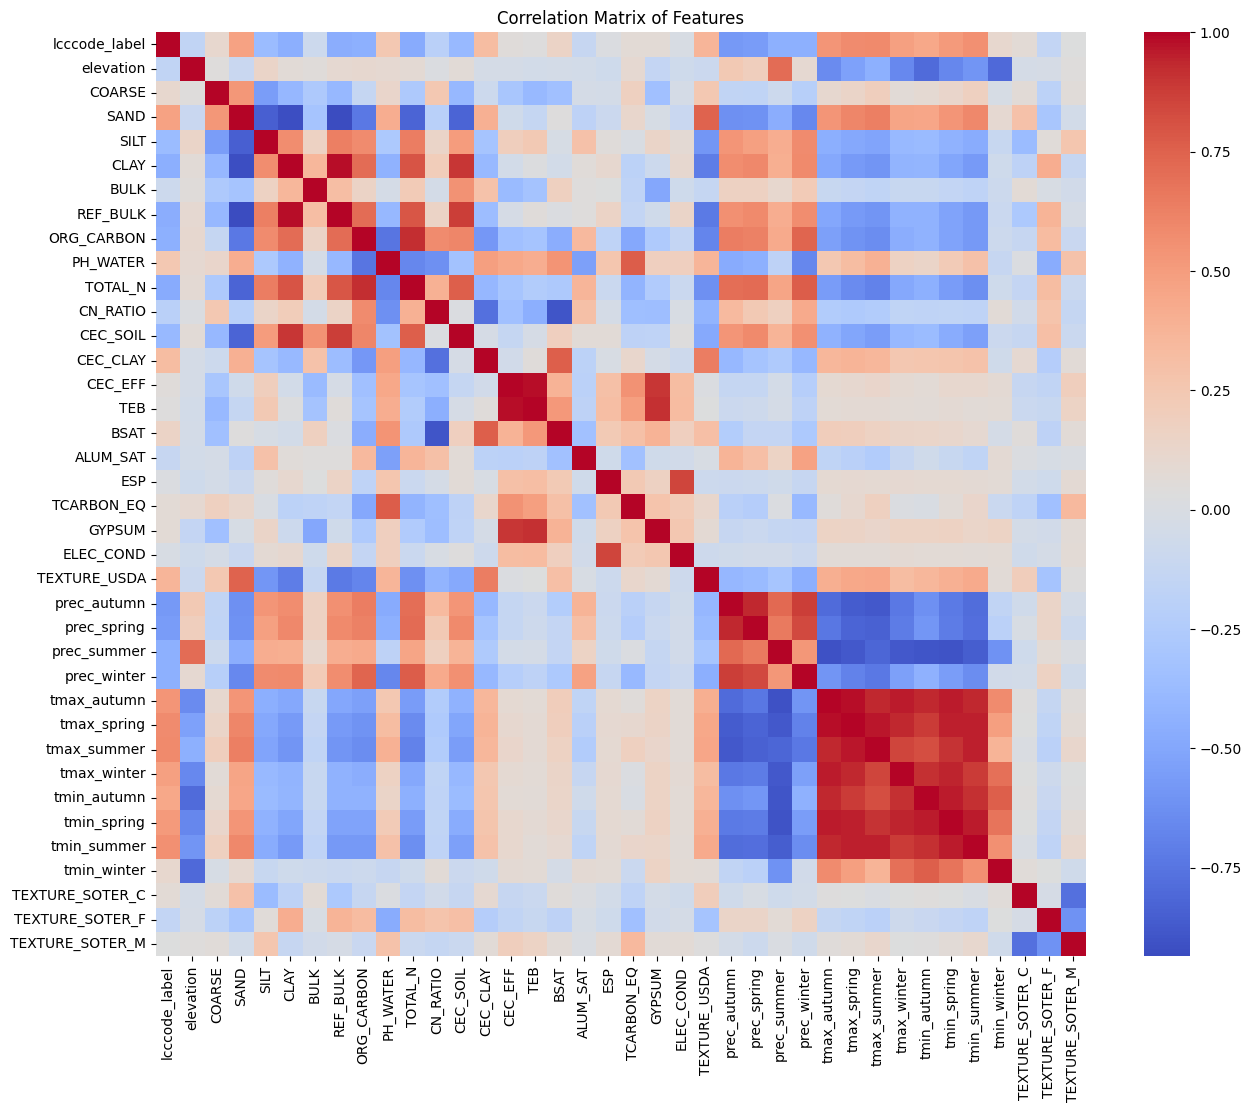

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Extracting highly linearly correlated feature pairs (corr > 0.95)

In [14]:
threshold = 0.95

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)

     Feature_1    Feature_2  Correlation
0     REF_BULK         CLAY     0.979060
1          TEB      CEC_EFF     0.980614
2  tmax_spring  tmax_autumn     0.978371
3  tmax_summer  tmax_spring     0.968236
4  tmax_winter  tmax_autumn     0.955063
5  tmin_spring  tmax_autumn     0.957291
6  tmin_spring  tmin_autumn     0.955870
7  tmin_summer  tmax_summer     0.953785
8  tmin_summer  tmin_spring     0.961819


#### `REF_BULK` and `CLAY`

The pair CLAY–REF_BULK shows a very high correlation (r ≈ 0.98), meaning they carry almost the same information. However, CLAY should be kept and REF_BULK removed for the following reasons:

📌 1. Direct relevance to USDA soil texture classification

The USDA texture class is explicitly defined using particle-size fractions, including the proportion of clay-sized particles (< 2 μm).

Clay percentage directly determines whether a soil is “Clay,” “Silty Clay,” “Clay Loam,” etc.

It is a primary classification variable in pedology.

Because clay content is baked into the very rules of soil texture classes, it has direct predictive power for anything related to soil behavior, water retention, and possibly fire susceptibility.

📌 2. CLAY is a primary physical soil property; REF_BULK is a derived structural property

Clay % is a fundamental intrinsic property tied to mineral composition.

Reference bulk density reflects how tightly particles are packed, which is influenced by clay content, organic matter, and structure.

REF_BULK is therefore a secondary property, and its high correlation with CLAY is expected because clay-rich soils have lower bulk density due to high porosity.
When two variables reflect the same phenomenon, we keep the more fundamental and directly interpretable one.

📌 3. CLAY is more stable and consistent across datasets

Clay percentage is measured or estimated consistently in global datasets like WISE30sec.

Reference bulk density varies more due to local compaction, management practices, and measurement methods.

Keeping the more universally standardized feature enhances model robustness.

📌 4. CLAY aligns better with soil processes relevant to fire prediction

Clay content influences:

water retention

infiltration

drying rate

heat propagation

vegetation type and fuel structure

Bulk density indirectly reflects some of these via porosity, but clay does so more directly.

Thus, CLAY has clearer mechanistic relevance for fire risk modeling.

📌 Conclusion

CLAY should be retained because it is the primary soil property defining texture, has direct physical meaning, is more stable, and is central to soil classification systems such as the USDA texture classes.
Reference bulk density is derivative, less fundamental, and redundant given the very high correlation.

In [15]:
X_train.drop(columns=['REF_BULK'], inplace=True)

#### `CLAY` and `TEXTURE_USDA` statistical test

In [16]:
df['TEXTURE_USDA'].value_counts()

,count
TEXTURE_USDA,
9.0,30687
11.0,16054
5.0,7960
12.0,334
10.0,95
3.0,89


here the appropriate test is an ANOVA test, to check whether point estimates (mean) of CLAY change accros groups of TEXTURE_USDA.

In [17]:
df.groupby('TEXTURE_USDA')['CLAY'].describe()


,count,mean,std,min,25%,50%,75%,max
TEXTURE_USDA,,,,,,,,
3.0,89.0,50.789326,1.072578,50.0,50.0,50.75,50.75,54.0
5.0,7960.0,28.709824,3.782550,14.8,26.3,27.40,29.70,50.8
9.0,30687.0,17.637842,4.163635,13.8,15.0,17.00,17.70,47.2
10.0,95.0,24.685789,2.870463,18.2,24.0,24.05,24.05,29.0
11.0,16054.0,16.196805,2.074607,12.6,16.0,16.00,16.20,43.2
12.0,334.0,12.214820,2.406063,9.2,11.4,11.40,11.40,23.2


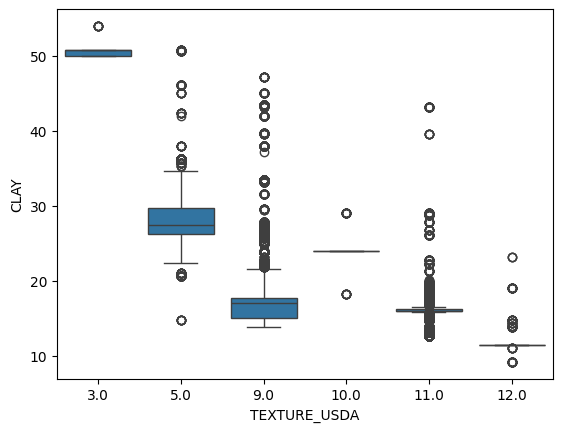

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='TEXTURE_USDA', y='CLAY')
plt.show()

The feature is imbalanced, it is derived from:
- Clay %
- Silt %
- Sand %

I'm just dropping it

In [19]:
X_train.drop(columns=['TEXTURE_USDA'], inplace=True)

#### `CLAY` and `TEXTURE_SOTER` statistical test

In [20]:
X_train['TEXTURE_SOTER'] = X_train[['TEXTURE_SOTER_C','TEXTURE_SOTER_M','TEXTURE_SOTER_F']].idxmax(axis=1).str[-1]
X_train['TEXTURE_SOTER'].head()


,TEXTURE_SOTER
32268,M
32792,M
15247,M
39752,M
30126,M


In [21]:
X_train['TEXTURE_SOTER'].value_counts()

,count
TEXTURE_SOTER,
M,47213
C,1525
F,959


M dominates the dataset, better to drop this attribute, since meaning is captured by other features.

In [22]:
# import pandas as pd
# import scipy.stats as stats

# contingency = pd.crosstab(X_train['TEXTURE_SOTER'], y_train)
# print(contingency)

# chi2, p, dof, expected = stats.chi2_contingency(contingency)
# print("Chi-square:", chi2)
# print("p-value:", p)

In [23]:
X_train.drop(columns=['TEXTURE_SOTER_M'], inplace=True)
X_train.drop(columns=['TEXTURE_SOTER'], inplace=True)
X_train.drop(columns=['TEXTURE_SOTER_F'], inplace=True)
X_train.drop(columns=['TEXTURE_SOTER_C'], inplace=True)

#### `TEB` and `CEC_EFF`

TEB (Total Exchangeable Bases)

Sum of base cations:

Ca²⁺

Mg²⁺

K⁺

Na⁺

It measures base saturation, soil fertility, and nutrient storage.

CEC_EFF (Effective Cation Exchange Capacity, ECEC)

Sum of:

Ca²⁺

Mg²⁺

K⁺

Na⁺ (same as TEB)
PLUS:

exchangeable acidity

H⁺

Al³⁺

So:

CEC_EFF = TEB + exchangeable acidity

=> Drop TEB since it's already contained within CEC_EFF

In [24]:
X_train.drop(columns=['TEB'], inplace=True)

#### Temperatures

4 seasons are overkill, reducing to 2 seasons (warm and cool)

In [25]:
tmax_cols = ['tmax_spring', 'tmax_summer', 'tmax_autumn', 'tmax_winter']
tmin_cols = ['tmin_spring', 'tmin_summer', 'tmin_autumn', 'tmin_winter']

# Warm season: Spring + Summer
X_train['tmax_warm'] = X_train[['tmax_spring', 'tmax_summer']].mean(axis=1)
X_train['tmin_warm'] = X_train[['tmin_spring', 'tmin_summer']].mean(axis=1)

# Cool season: Autumn + Winter
X_train['tmax_cool'] = X_train[['tmax_autumn', 'tmax_winter']].mean(axis=1)
X_train['tmin_cool'] = X_train[['tmin_autumn', 'tmin_winter']].mean(axis=1)

X_train = X_train.drop(columns=tmax_cols + tmin_cols)

print(X_train[['tmax_warm','tmax_cool','tmin_warm','tmin_cool']].head())


       tmax_warm  tmax_cool  tmin_warm  tmin_cool
32268       28.0       18.0       13.5        6.5
32792       31.0       21.5       17.0       10.5
15247       38.0       27.0       21.0       11.5
39752       28.5       18.5       13.5        7.0
30126       27.0       16.5       12.5        5.5


#### Wrap-up

In [26]:
corr_matrix = X_train.corr()
threshold = 0.9

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)

     Feature_1    Feature_2  Correlation
0      TOTAL_N   ORG_CARBON     0.919286
1  prec_spring  prec_autumn     0.935681
2    tmin_warm    tmax_warm     0.956772
3    tmax_cool    tmax_warm     0.947556
4    tmax_cool    tmin_warm     0.950856


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49697 entries, 32268 to 546
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lcccode_label  49697 non-null  float64
 1   elevation      49697 non-null  float64
 2   COARSE         49697 non-null  float64
 3   SAND           49697 non-null  float64
 4   SILT           49697 non-null  float64
 5   CLAY           49697 non-null  float64
 6   BULK           49697 non-null  float64
 7   ORG_CARBON     49697 non-null  float64
 8   PH_WATER       49697 non-null  float64
 9   TOTAL_N        49697 non-null  float64
 10  CN_RATIO       49697 non-null  float64
 11  CEC_SOIL       49697 non-null  float64
 12  CEC_CLAY       49697 non-null  float64
 13  CEC_EFF        49697 non-null  float64
 14  BSAT           49697 non-null  float64
 15  ALUM_SAT       49697 non-null  float64
 16  ESP            49697 non-null  float64
 17  TCARBON_EQ     49697 non-null  float64
 18  GYPSUM   

clay + silt + sand = 100

In [28]:
(X_train['CLAY'] + X_train['SILT'] + X_train['SAND']).value_counts()

,count
100.0,46327
100.0,1838
100.0,1265
100.0,257
100.0,10


1️⃣ Clay

Tiny, tiny bits of dirt — so small you can’t see them.

Feels sticky when wet and hard when dry or baked.

Holds lots of water because the tiny bits pack together tightly.

Think: like flour in dough — soft, sticky, holds water.

2️⃣ Silt

A bit bigger than clay, but still very small.

Feels smooth and slippery, kind of like baby powder.

Holds some water, but not as much as clay.

Think: like powdered sugar — soft, smooth, not sticky.

3️⃣ Sand

Big bits of dirt you can see and feel.

Feels gritty and drains water quickly.

Doesn’t stick together well.

Think: like beach sand — rough, loose, lets water flow through.

All soil is made by mixing clay + silt + sand in different amounts.

More clay → sticky soil, holds water → **harder for fire to start**

More sand → dry, drains fast → **easier for fire to start**

More silt → smooth soil, somewhere in between

=> drop silt, and keep clay and sand since (1) they hold more predictive power and (2) silt can be extracted from the 2 impilictly because of perfect linearity.

In [29]:
X_train.drop(columns=['SILT'], inplace=True)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49697 entries, 32268 to 546
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lcccode_label  49697 non-null  float64
 1   elevation      49697 non-null  float64
 2   COARSE         49697 non-null  float64
 3   SAND           49697 non-null  float64
 4   CLAY           49697 non-null  float64
 5   BULK           49697 non-null  float64
 6   ORG_CARBON     49697 non-null  float64
 7   PH_WATER       49697 non-null  float64
 8   TOTAL_N        49697 non-null  float64
 9   CN_RATIO       49697 non-null  float64
 10  CEC_SOIL       49697 non-null  float64
 11  CEC_CLAY       49697 non-null  float64
 12  CEC_EFF        49697 non-null  float64
 13  BSAT           49697 non-null  float64
 14  ALUM_SAT       49697 non-null  float64
 15  ESP            49697 non-null  float64
 16  TCARBON_EQ     49697 non-null  float64
 17  GYPSUM         49697 non-null  float64
 18  ELEC_COND

In [31]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

mi = mutual_info_classif(X_train, y_train, random_state=42)

mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
print(mi_series)


elevation        0.181536
prec_spring      0.145623
prec_winter      0.136966
ORG_CARBON       0.132868
TCARBON_EQ       0.129964
CEC_CLAY         0.129596
TOTAL_N          0.127729
prec_autumn      0.127404
GYPSUM           0.126894
BULK             0.124739
SAND             0.120422
PH_WATER         0.119070
CLAY             0.110644
CEC_EFF          0.109761
COARSE           0.105078
CEC_SOIL         0.101802
tmin_warm        0.095781
tmax_warm        0.082402
ESP              0.081469
BSAT             0.080974
tmax_cool        0.075170
prec_summer      0.075053
tmin_cool        0.074898
CN_RATIO         0.052288
ELEC_COND        0.031245
lcccode_label    0.031027
ALUM_SAT         0.003306
dtype: float64


consider dropping elec_cond and alum_sat

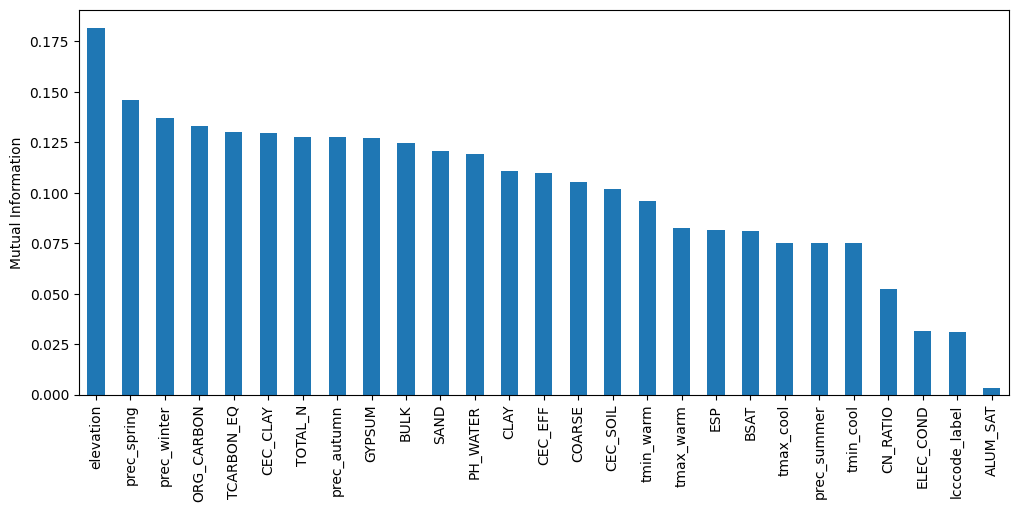

In [32]:
import matplotlib.pyplot as plt

mi_series.sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.ylabel("Mutual Information")
plt.show()

In [33]:
X_train.drop(columns=['PH_WATER'], inplace=True)

### Removing Features not relevant to the task

### Feature Engineering

#### Scaling

In [34]:
stats = X_train.describe()

In [35]:
stats.iloc[:, :10]

,lcccode_label,elevation,COARSE,SAND,CLAY,BULK,ORG_CARBON,TOTAL_N,CN_RATIO,CEC_SOIL
count,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000
mean,10.870636,505.488400,11.638058,50.905538,18.850433,1.427168,0.832334,0.842556,9.961454,13.606444
std,7.601684,337.449519,3.729061,8.692356,5.647784,0.040477,0.410225,0.236550,0.965393,3.549987
min,0.000000,-29.000000,2.000000,15.000000,9.200000,1.110000,0.361000,0.446000,8.000000,5.800000
25%,3.000000,224.000000,9.300000,47.000000,15.000000,1.410000,0.617700,0.690000,9.000000,10.900000
50%,9.000000,454.000000,12.000000,53.600000,16.300000,1.429000,0.678200,0.752000,9.700000,13.000000
75%,18.000000,702.000000,15.000000,57.500000,19.800000,1.447000,0.704000,0.878000,11.000000,14.500000
max,21.000000,2167.000000,37.600000,79.500000,54.000000,1.760000,4.192600,2.962000,18.050000,40.150000


In [36]:
stats.iloc[:, 10:20]

,CEC_CLAY,CEC_EFF,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,prec_autumn,prec_spring
count,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000
mean,60.177967,35.360868,92.333197,0.174833,4.482107,9.187579,3.538379,1.560354,41.777834,30.397026
std,11.085345,14.302236,7.677324,1.256356,6.440593,3.258252,6.722432,2.263602,40.291441,30.632897
min,26.800000,9.000000,28.600000,0.000000,1.000000,0.000000,0.060000,0.100000,2.000000,0.000000
25%,51.000000,30.200000,82.000000,0.000000,2.500000,8.000000,0.300000,1.000000,9.000000,8.000000
50%,60.400000,31.500000,94.200000,0.000000,2.800000,9.680000,1.560000,1.000000,27.000000,16.000000
75%,71.900000,35.200000,99.100000,0.000000,4.000000,10.550000,3.790000,1.300000,62.000000,46.000000
max,83.000000,143.000000,100.000000,24.000000,67.000000,27.059999,57.599998,32.000000,231.000000,176.000000


#### Transform skewed data

In [37]:
# Get numerical columns
numerical_columns = X_train.select_dtypes(include=['number']).columns
# Drop categorical columns
numerical_columns = numerical_columns.drop(['lcccode_label'])
numerical_columns

Index(['elevation', 'COARSE', 'SAND', 'CLAY', 'BULK', 'ORG_CARBON', 'TOTAL_N',
       'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'BSAT', 'ALUM_SAT',
       'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND', 'prec_autumn',
       'prec_spring', 'prec_summer', 'prec_winter', 'tmax_warm', 'tmin_warm',
       'tmax_cool', 'tmin_cool'],
      dtype='object')

In [38]:
numerical_0s = X_train.loc[:, (X_train == 0).any()].select_dtypes(include=['number']).columns
numerical_0s

Index(['lcccode_label', 'elevation', 'ALUM_SAT', 'TCARBON_EQ', 'prec_spring',
       'prec_summer', 'prec_winter'],
      dtype='object')

In [39]:
numerical_neg = X_train.loc[:, (X_train < 0).any()].select_dtypes(include=['number']).columns
numerical_neg

Index(['elevation'], dtype='object')

In [40]:
# # Identify columns containing zeros
# numerical_0s = df.loc[:, (df <= 0).any()].select_dtypes(include=['number']).columns

# # Remove columns that contain zeros from consideration
# numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = X_train[numerical_columns].skew()

# Set threshold for skewness
skewed_columns = skewness[abs(skewness) > 2]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
CLAY           2.031106
ORG_CARBON     2.085280
CEC_SOIL       2.264357
CEC_EFF        2.978549
ALUM_SAT       9.726685
ESP            6.060291
GYPSUM         3.989653
ELEC_COND      8.475677
prec_winter    2.761272
dtype: float64


Since there are values <= 0, we will use a shifted version of log1p to get strictly positive values.

In [41]:
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

def shifted_log1p(x):
    # shift each column independently
    return np.log1p(x - np.min(x, axis=0) + 1)

log_transformer = FunctionTransformer(shifted_log1p, validate=False)

preprocess = ColumnTransformer([
    ('log', Pipeline([
        ('log', log_transformer),
        ('scale', RobustScaler())
    ]), skewed_columns.index.tolist()),

    ('scale_only', RobustScaler(), X_train.columns.difference(skewed_columns.index).tolist())
])

X_train_scaled = preprocess.fit_transform(X_train)
X_train_scaled

array([[ 0.29839215, -0.61183796, -0.05358762, ..., -0.875     ,
        -1.66666667, -1.        ],
       [ 0.37635218,  0.92664793,  0.36825708, ..., -0.5       ,
        -0.33333333, -0.46153846],
       [ 0.71140515,  0.19249257,  0.68812187, ...,  0.375     ,
         0.        ,  0.15384615],
       ...,
       [ 0.64520314,  0.81312199,  0.34536359, ..., -0.75      ,
         0.66666667, -0.38461538],
       [ 0.15452905, -0.43358521,  0.15403892, ..., -0.625     ,
        -1.83333333, -0.84615385],
       [-0.04633942, -0.95169356,  0.        , ...,  0.25      ,
        -0.16666667,  0.07692308]])

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()

,lcccode_label,elevation,COARSE,SAND,CLAY,BULK,ORG_CARBON,TOTAL_N,CN_RATIO,CEC_SOIL,...,GYPSUM,ELEC_COND,prec_autumn,prec_spring,prec_summer,prec_winter,tmax_warm,tmin_warm,tmax_cool,tmin_cool
count,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,...,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000,49697.000000
mean,0.336323,1.409061,0.026093,0.293854,0.036024,0.433735,0.155219,1.086043,0.237237,-0.109170,...,0.481683,0.107716,0.124709,0.278827,0.378869,0.310937,-0.189054,-0.216156,-0.249247,-0.179845
std,0.806730,3.871257,0.770870,2.109851,0.230135,1.446535,0.689120,3.016172,0.707259,0.448966,...,1.258246,0.705961,0.506779,0.760216,0.806129,0.620890,0.608207,0.568551,0.724030,0.533154
min,-3.159325,-3.922672,-3.720737,-12.837679,0.000000,-1.799549,-0.595818,-3.774515,-1.157680,-3.836257,...,-1.627660,-1.010460,-0.600000,-0.471698,-0.421053,-0.285714,-2.166667,-1.750000,-2.833333,-1.846154
25%,-0.321433,-0.704955,-0.631743,-0.279351,0.000000,-0.230569,-0.475158,0.000000,-0.232964,-0.713450,...,-0.329787,-0.481172,-0.400000,-0.339623,-0.210526,-0.214286,-0.666667,-0.750000,-0.666667,-0.692308
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.678567,0.295045,0.368257,0.720649,0.000000,0.769431,0.524842,1.000000,0.767036,0.286550,...,0.670213,0.518828,0.600000,0.660377,0.789474,0.785714,0.333333,0.250000,0.333333,0.307692
max,3.414722,24.592764,3.349980,8.782008,2.564949,8.087214,3.017212,24.976660,2.142012,0.339181,...,11.755320,3.583682,0.800000,3.849057,4.210526,2.357143,1.000000,0.687500,1.333333,0.692308


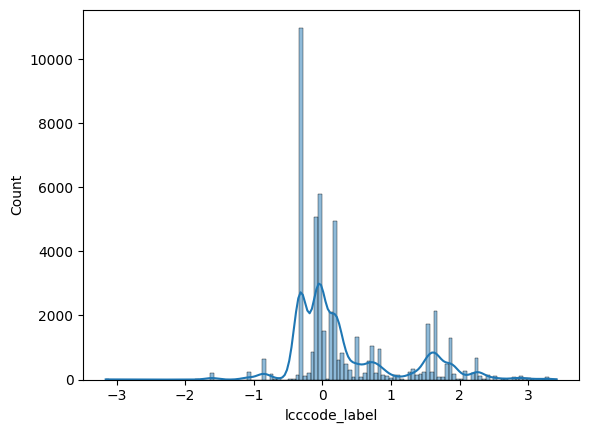

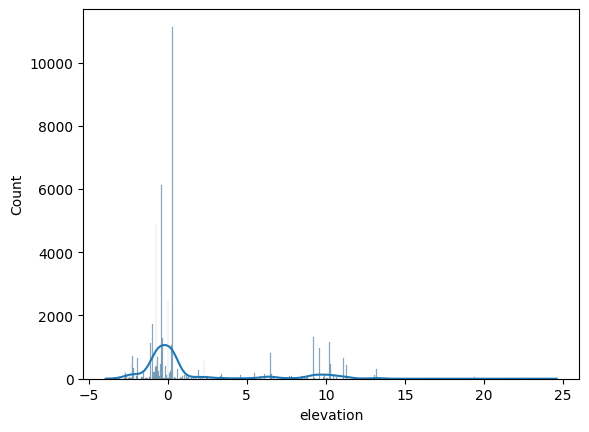

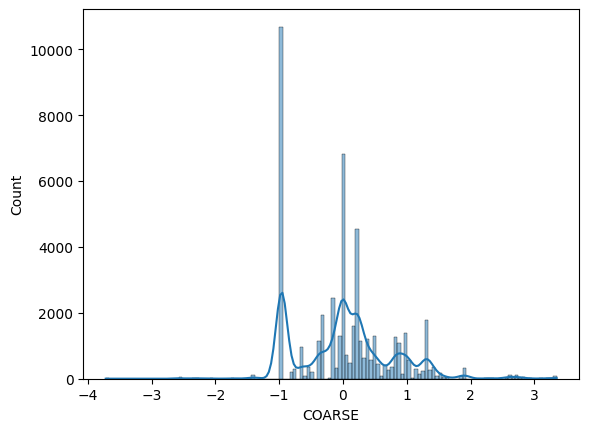

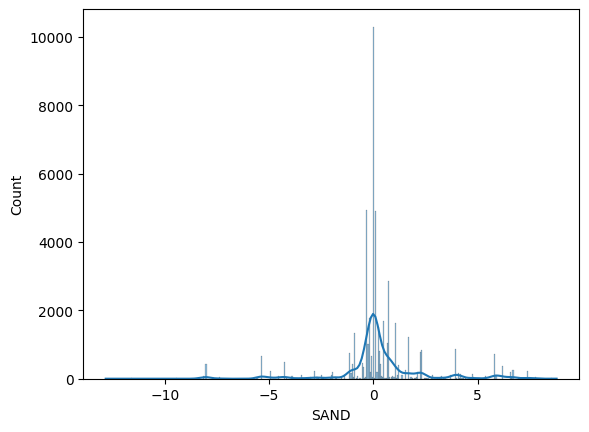

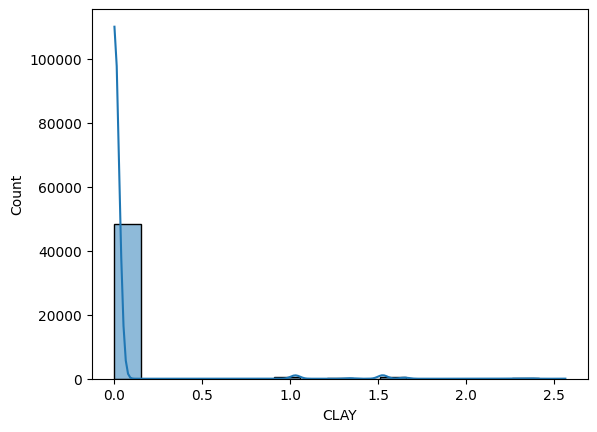

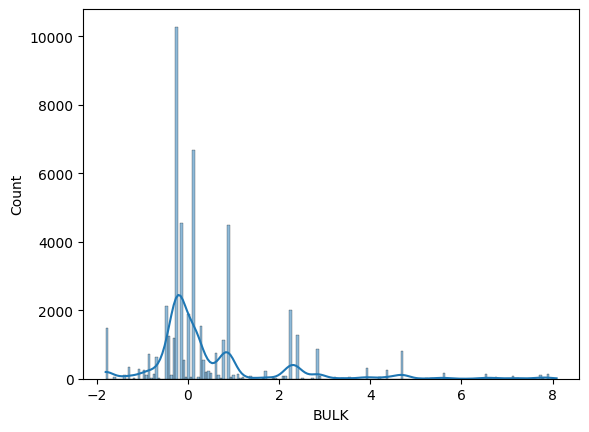

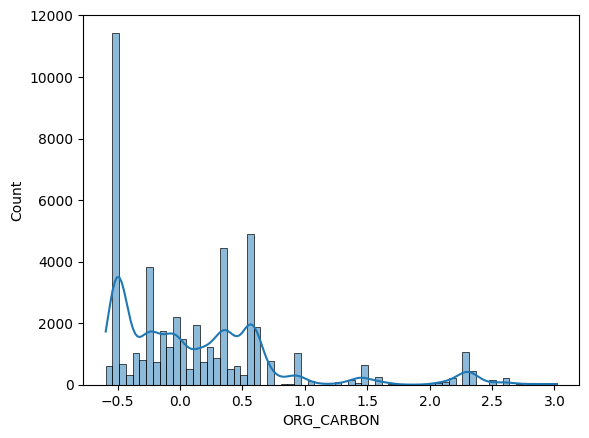

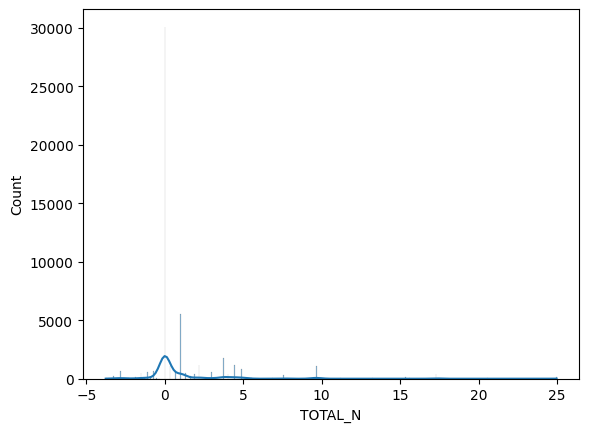

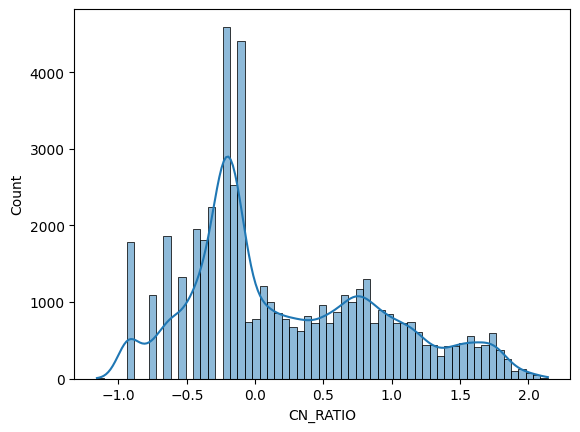

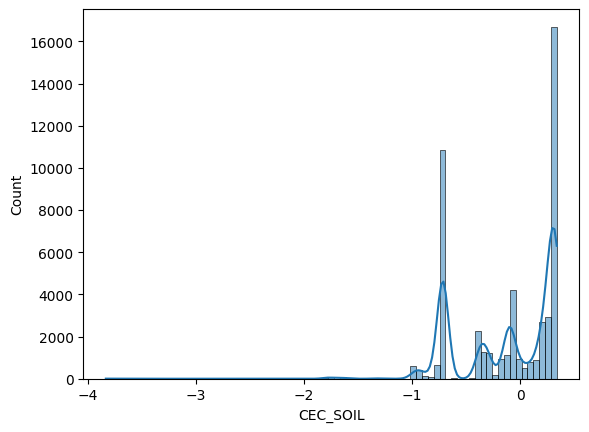

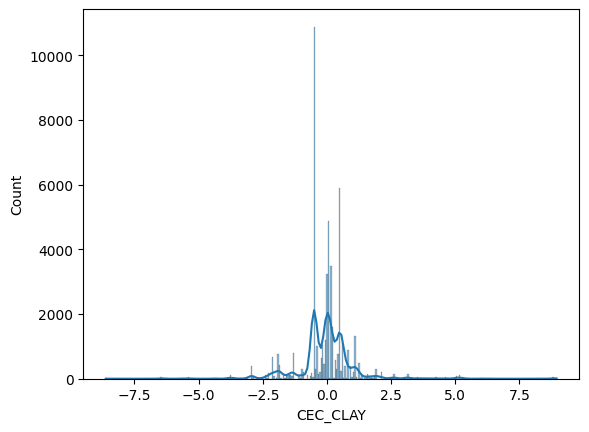

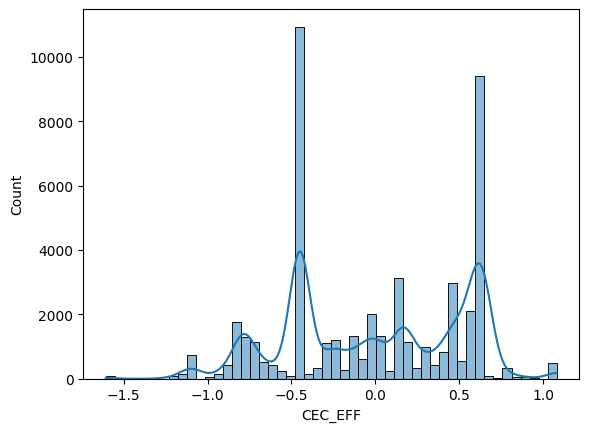

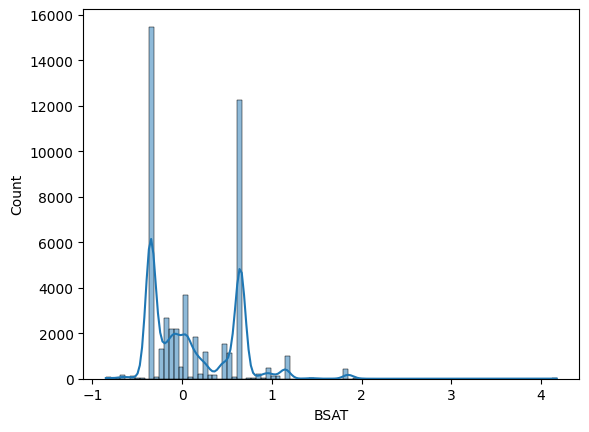

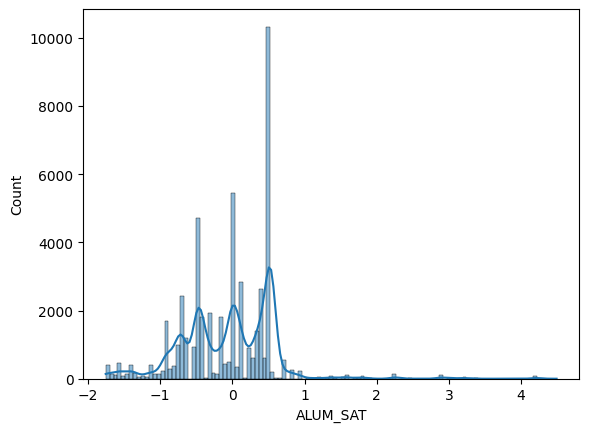

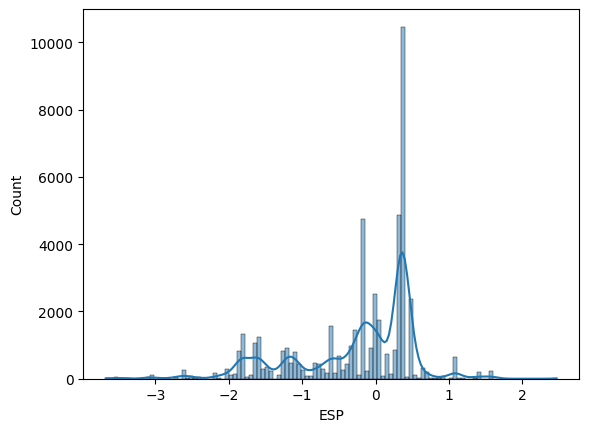

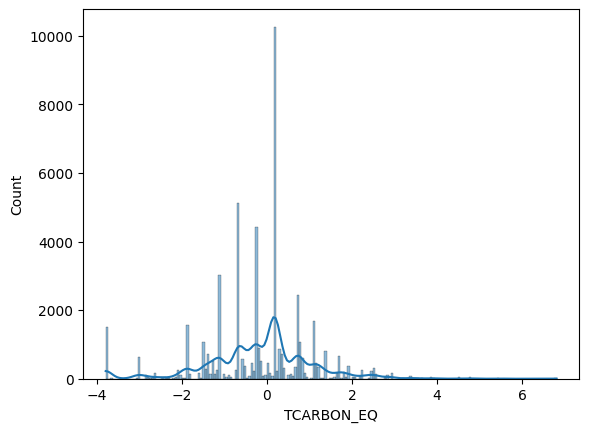

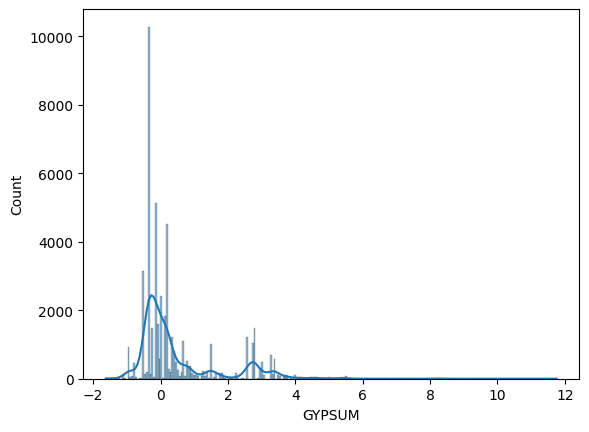

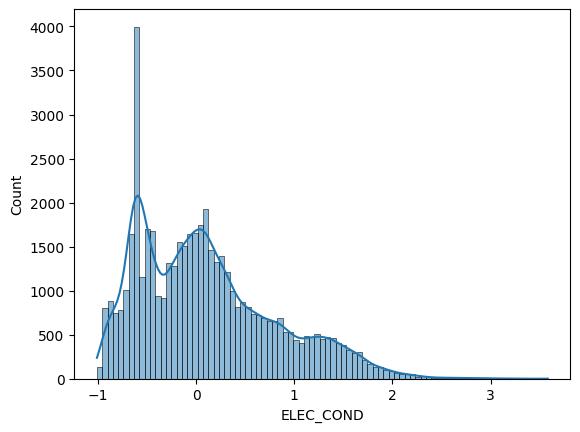

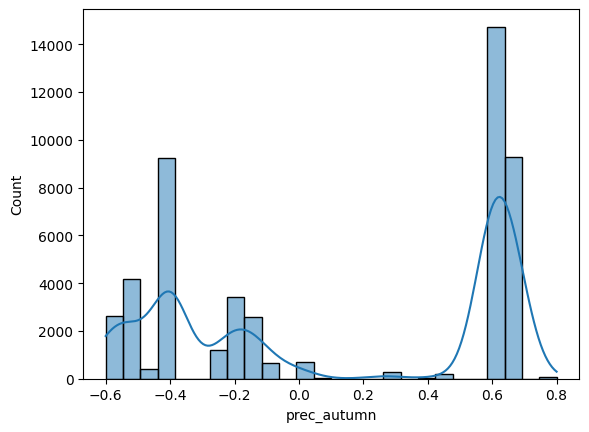

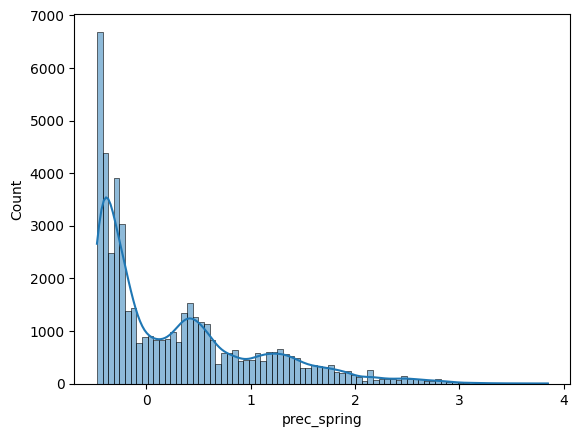

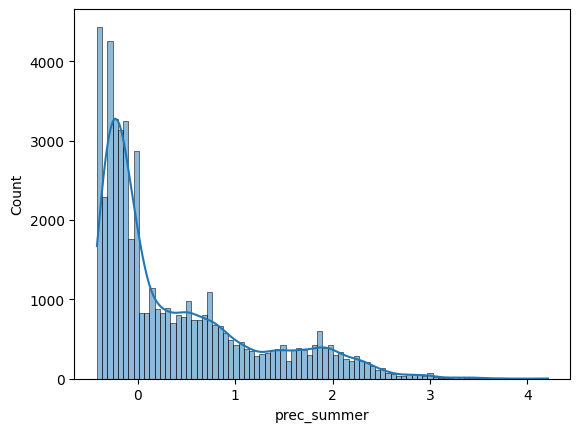

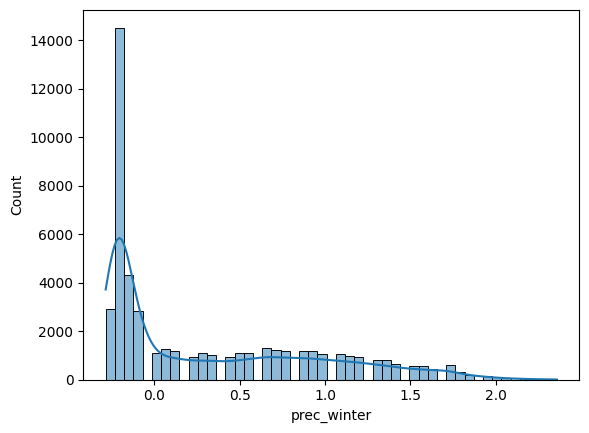

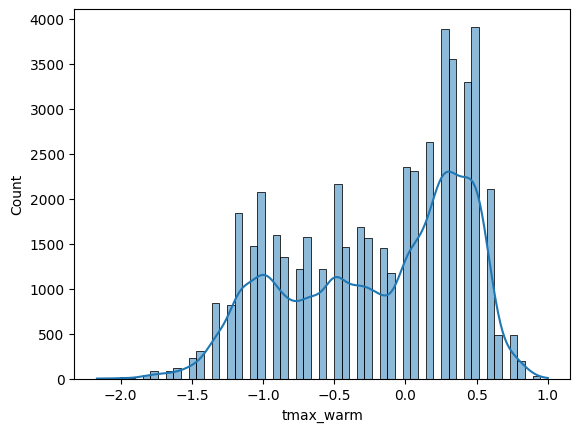

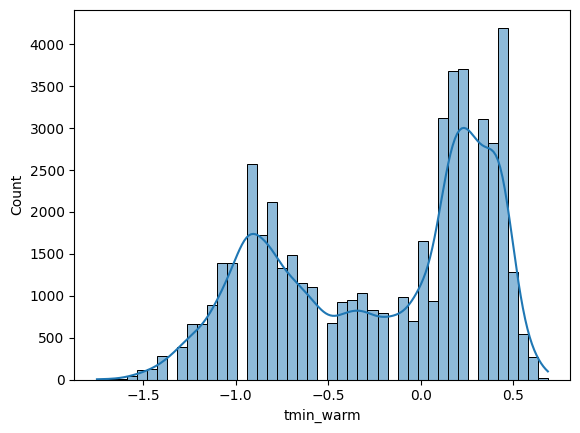

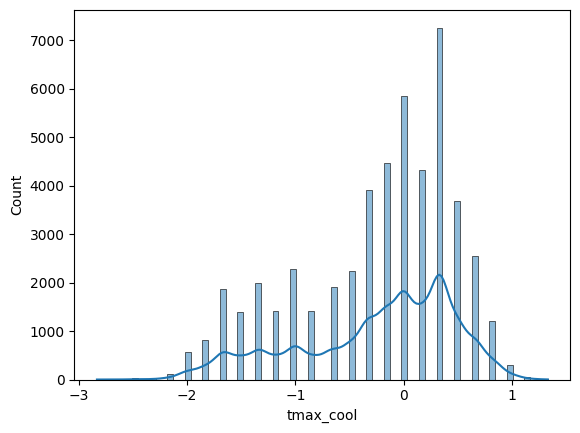

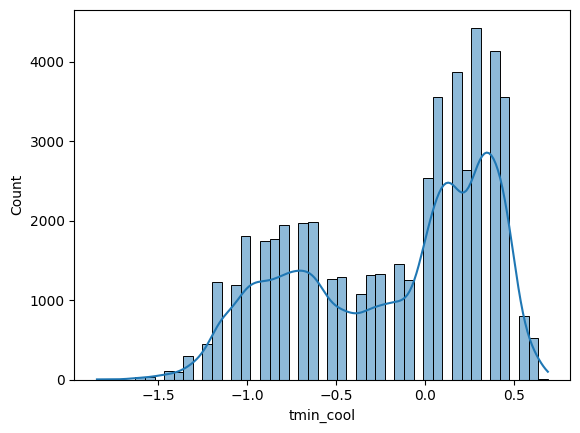

In [43]:
for col in X_train.columns:
  sns.histplot(data=X_train_scaled, x=col, kde=True)
  plt.show()

Robust scaler seems like the best fit

In [44]:
# scaler = RobustScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_train_scaled.head()

In [45]:
# X_train_scaled.describe()

Before manual feature selection, let's check how many features would preserve 99% of the variance using PCA

13


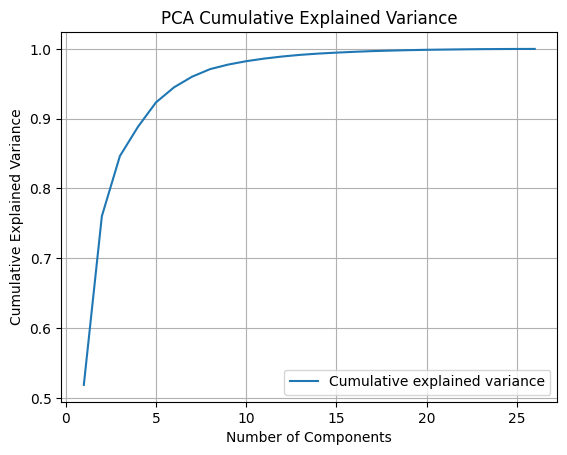

In [46]:
from sklearn.decomposition import PCA

pca_cumsum = PCA()
pca_cumsum.fit(X_train_scaled)
cumsum = np.cumsum(pca_cumsum.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1
print(d)
# Code and method copied from HOML

plt.plot(range(1, cumsum.shape[0] + 1), cumsum, label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

14 components would be enough according to PCA, maybe do more feature scaling

In [47]:
pca_14 = PCA(n_components=14)
X_train_pca = pca_14.fit_transform(X_train_scaled)

In [48]:
X_train_pca[:1,:]

array([[-2.56552347,  0.20426296,  4.65101235,  0.98326821, -1.03267167,
        -0.66426472,  0.58657313,  0.06792687, -0.26892977,  0.18773004,
         0.18700945, -0.59925031, -0.35006241,  0.03023369]])

## Resampling

### Oversampling with SMOTE

In [49]:
! pip install imblearn

((76456, 26), (76456,), np.int64(38228))

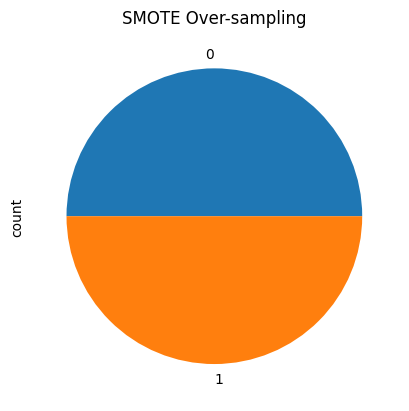

In [50]:
from imblearn.over_sampling import SMOTE

smot = SMOTE(random_state=42)
X_res_o, y_res_o = smot.fit_resample(X_train_scaled, y_train)
ax=y_res_o.value_counts().plot.pie()
_ = ax.set_title("SMOTE Over-sampling")
X_res_o.shape, y_res_o.shape, y_res_o.sum()

## K-NN test

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_res_o, y_res_o)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1_macro')

In [52]:
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 3}
Best Score: 0.9481179463255461


In [53]:
print(classification_report(y_train, best_knn.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     38228
           1       0.88      0.98      0.93     11469

    accuracy                           0.96     49697
   macro avg       0.94      0.97      0.95     49697
weighted avg       0.97      0.96      0.97     49697



In [54]:
print(classification_report(y_res_o, best_knn.predict(X_res_o)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     38228
           1       0.96      0.99      0.98     38228

    accuracy                           0.98     76456
   macro avg       0.98      0.98      0.98     76456
weighted avg       0.98      0.98      0.98     76456



### Random Over Sampler

((76456, 26), (76456,), np.int64(38228))

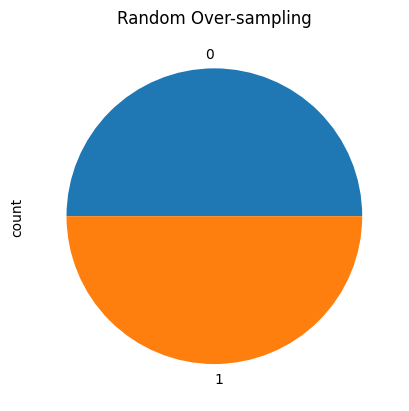

In [55]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_res_ros, y_res_ros = ros.fit_resample(X_train_scaled, y_train)
ax=y_res_ros.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_ros.shape, y_res_ros.shape, y_res_ros.sum()

In [56]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
}

grid_search2 = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search2.fit(X_res_ros, y_res_ros)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1_macro')

In [57]:
best_knn_ros = grid_search2.best_estimator_
best_params = grid_search2.best_params_
best_score = grid_search2.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 3}
Best Score: 0.9508951688483294


In [58]:
print(classification_report(y_train, best_knn.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     38228
           1       0.87      0.99      0.93     11469

    accuracy                           0.97     49697
   macro avg       0.94      0.98      0.95     49697
weighted avg       0.97      0.97      0.97     49697



## Dropping some more features

### According to MI results

In [59]:
X_train_scaled.drop(columns=['ELEC_COND', 'ALUM_SAT'], inplace=True)

retraining

## SMOTE

((76456, 24), (76456,), np.int64(38228))

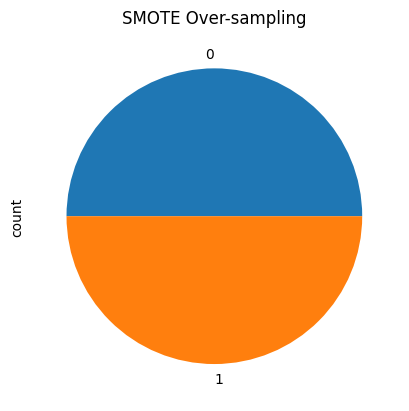

In [60]:
smot = SMOTE(random_state=42)
X_smot_o, y_smot_o = smot.fit_resample(X_train_scaled, y_train)
ax=y_smot_o.value_counts().plot.pie()
_ = ax.set_title("SMOTE Over-sampling")
X_smot_o.shape, y_smot_o.shape, y_smot_o.sum()

In [61]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_smot_o, y_smot_o)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='recall_weighted')

In [63]:
best_knn_smot = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 5}
Best Score: 0.9328898561886705


In [64]:
print(classification_report(y_train, best_knn_smot.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     38228
           1       0.85      0.95      0.90     11469

    accuracy                           0.95     49697
   macro avg       0.92      0.95      0.93     49697
weighted avg       0.95      0.95      0.95     49697



In [65]:
X_train_scaled.columns

Index(['lcccode_label', 'elevation', 'COARSE', 'SAND', 'CLAY', 'BULK',
       'ORG_CARBON', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
       'BSAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'prec_autumn', 'prec_spring',
       'prec_summer', 'prec_winter', 'tmax_warm', 'tmin_warm', 'tmax_cool',
       'tmin_cool'],
      dtype='object')

In [66]:
df.columns

Index(['lcccode_label', 'elevation', 'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK',
       'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL',
       'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ',
       'GYPSUM', 'ELEC_COND', 'TEXTURE_USDA', 'prec_autumn', 'prec_spring',
       'prec_summer', 'prec_winter', 'tmax_autumn', 'tmax_spring',
       'tmax_summer', 'tmax_winter', 'tmin_autumn', 'tmin_spring',
       'tmin_summer', 'tmin_winter', 'TEXTURE_SOTER_C', 'TEXTURE_SOTER_F',
       'TEXTURE_SOTER_M', 'fire'],
      dtype='object')

In [67]:
X_test.columns

Index(['lcccode_label', 'elevation', 'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK',
       'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL',
       'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ',
       'GYPSUM', 'ELEC_COND', 'TEXTURE_USDA', 'prec_autumn', 'prec_spring',
       'prec_summer', 'prec_winter', 'tmax_autumn', 'tmax_spring',
       'tmax_summer', 'tmax_winter', 'tmin_autumn', 'tmin_spring',
       'tmin_summer', 'tmin_winter', 'TEXTURE_SOTER_C', 'TEXTURE_SOTER_F',
       'TEXTURE_SOTER_M'],
      dtype='object')

In [68]:
def transform_test_pipeline(X, preprocess):
  X = X.drop(columns=['TEXTURE_USDA', 'TEXTURE_SOTER_M', 'TEXTURE_SOTER_F', 'TEXTURE_SOTER_C', 'TEB', 'REF_BULK', 'SILT', 'PH_WATER'])

  tmax_cols = ['tmax_spring', 'tmax_summer', 'tmax_autumn', 'tmax_winter']
  tmin_cols = ['tmin_spring', 'tmin_summer', 'tmin_autumn', 'tmin_winter']

  # Warm season: Spring + Summer
  X['tmax_warm'] = X[['tmax_spring', 'tmax_summer']].mean(axis=1)
  X['tmin_warm'] = X[['tmin_spring', 'tmin_summer']].mean(axis=1)

  # Cool season: Autumn + Winter
  X['tmax_cool'] = X[['tmax_autumn', 'tmax_winter']].mean(axis=1)
  X['tmin_cool'] = X[['tmin_autumn', 'tmin_winter']].mean(axis=1)

  X = X.drop(columns=tmax_cols + tmin_cols)

  X_scaled = preprocess.transform(X)
  print(X_scaled)

  X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

  X_scaled = X_scaled.drop(columns=['ALUM_SAT', 'ELEC_COND'])

  return X_scaled



In [69]:
X_test_scaled = transform_test_pipeline(X_test, preprocess)

[[-0.32143314  0.06890709 -1.48669297 ...  0.125       0.16666667
   0.23076923]
 [ 0.39539513 -0.07139151 -0.40248731 ... -1.125      -1.83333333
  -1.23076923]
 [-0.14222702 -1.05677477 -0.25100142 ...  0.375       0.66666667
   0.38461538]
 ...
 [ 0.15452905 -0.66601896 -0.16443119 ... -0.5625     -1.83333333
  -0.84615385]
 [ 0.19665549 -0.6789914  -0.08082968 ...  0.375       0.16666667
   0.30769231]
 [ 0.19665549 -0.6789914  -0.08082968 ...  0.4375      0.16666667
   0.30769231]]


In [70]:
X_train_scaled.describe(), X_test_scaled.describe()

(       lcccode_label     elevation        COARSE          SAND          CLAY  \
 count   49697.000000  49697.000000  49697.000000  49697.000000  49697.000000   
 mean        0.336323      1.409061      0.026093      0.293854      0.036024   
 std         0.806730      3.871257      0.770870      2.109851      0.230135   
 min        -3.159325     -3.922672     -3.720737    -12.837679      0.000000   
 25%        -0.321433     -0.704955     -0.631743     -0.279351      0.000000   
 50%         0.000000      0.000000      0.000000      0.000000      0.000000   
 75%         0.678567      0.295045      0.368257      0.720649      0.000000   
 max         3.414722     24.592764      3.349980      8.782008      2.564949   
 
                BULK    ORG_CARBON       TOTAL_N      CN_RATIO      CEC_SOIL  \
 count  49697.000000  49697.000000  49697.000000  49697.000000  49697.000000   
 mean       0.433735      0.155219      1.086043      0.237237     -0.109170   
 std        1.446535      0.6

In [71]:
X_train_scaled.info(), X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49697 entries, 0 to 49696
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lcccode_label  49697 non-null  float64
 1   elevation      49697 non-null  float64
 2   COARSE         49697 non-null  float64
 3   SAND           49697 non-null  float64
 4   CLAY           49697 non-null  float64
 5   BULK           49697 non-null  float64
 6   ORG_CARBON     49697 non-null  float64
 7   TOTAL_N        49697 non-null  float64
 8   CN_RATIO       49697 non-null  float64
 9   CEC_SOIL       49697 non-null  float64
 10  CEC_CLAY       49697 non-null  float64
 11  CEC_EFF        49697 non-null  float64
 12  BSAT           49697 non-null  float64
 13  ESP            49697 non-null  float64
 14  TCARBON_EQ     49697 non-null  float64
 15  GYPSUM         49697 non-null  float64
 16  prec_autumn    49697 non-null  float64
 17  prec_spring    49697 non-null  float64
 18  prec_s

(None, None)

In [72]:
print(classification_report(y_test, best_knn_smot.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4248
           1       0.77      0.83      0.80      1274

    accuracy                           0.90      5522
   macro avg       0.86      0.88      0.87      5522
weighted avg       0.91      0.90      0.91      5522



In [ ]:
print(classification_report(y_test, best_knn_ros.predict(X_test_scaled)))

In [78]:
from collections import Counter
from tqdm import tqdm
from sklearn.neighbors import BallTree
import numpy as np

class KNN:
    def __init__(self, k=3, use_tqdm=False, use_balltree=True):
        self.k = k
        self.use_tqdm = use_tqdm
        self.use_balltree = use_balltree
        self.tree = None
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X, dtype=float)
        self.y_train = np.array(y)

        if self.use_balltree:
            self.tree = BallTree(self.X_train, leaf_size=40, metric='euclidean')

        return self

    def predict(self, X):
        X = np.array(X, dtype=float)

        if self.use_balltree:
            # BallTree does batch querying efficiently
            dists, idxs = self.tree.query(X, k=self.k)
            return np.array([self._vote(self.y_train[i]) for i in idxs])

        # --- FALLBACK to brute force ---
        iterator = tqdm(X, desc="Predicting") if self.use_tqdm else X
        return np.array([self._predict_single(x) for x in iterator])

    def _predict_single(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        return self._vote(self.y_train[k_indices])

    def _vote(self, labels):
        most_common = Counter(labels).most_common(1)
        return most_common[0][0]

In [79]:
from sklearn.metrics import classification_report, accuracy_score

knn = KNN(k=5, use_tqdm=True)
knn.fit(X_res_o, y_res_o)

In [80]:
y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4248
           1       0.77      0.83      0.80      1274

    accuracy                           0.90      5522
   macro avg       0.86      0.88      0.87      5522
weighted avg       0.91      0.90      0.91      5522

Accuracy: 0.9045635639261137
